In [1]:
#Librerias varias
import pandas as pd 
import numpy as np
import re       # libreria de expresiones regulares
import string   # libreria de cadena de caracteres
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud # importo la funcion WordCloud

# Objetos de sklearn para hacer tópicos
from sklearn.feature_extraction.text import CountVectorizer # Contador de frecuencia
from sklearn.feature_extraction.text import TfidfTransformer # Creador de tf-idf

# Algoritmos de descomposición de tópicos
from sklearn.decomposition import NMF 
from sklearn.decomposition import LatentDirichletAllocation

import multiprocessing

from gensim.models import Word2Vec

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from google.colab import drive 
drive.mount('/content/drive') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Mounted at /content/drive


In [ ]:
#%%DATAFRAMES
episodes_count = [6, 24, 16, 22, 22, 20, 12]
episodes_list = []
for i in range(1,8):
    for j in range(1,episodes_count[i-1]+1):
        if j<10:
            episodes_list.append(pd.read_csv('../input/parks-and-recreation-scripts/scripts/s'+str(i)+'e0'+str(j)+'.csv'))
        else:
            episodes_list.append(pd.read_csv('../input/parks-and-recreation-scripts/scripts/s'+str(i)+'e'+str(j)+'.csv'))
#Breakdown by season
df_s1_list = episodes_list[0:6]
df_s2_list = episodes_list[6:30]
df_s3_list = episodes_list[30:46]
df_s4_list = episodes_list[46:68]
df_s5_list = episodes_list[68:90]
df_s6_list = episodes_list[90:110]
df_s7_list = episodes_list[110:122]

df_all = pd.concat(episodes_list)

df_seasons = [pd.concat(df_s1_list),pd.concat(df_s2_list),pd.concat(df_s3_list),pd.concat(df_s4_list),pd.concat(df_s5_list),pd.concat(df_s6_list),pd.concat(df_s7_list) ]

main_characters = df_all['Character'].value_counts()[:7].index.tolist()


#CAMBIOS EN EL DATAFRAME
lista_ann = [17388, 52371,54618,54827, 15554, 30541, 9755, 10267, 19632, 22844, 36472, 54352,
             20193, 29272, 39191, 39592, 42512, 42535, 56726]

lista_ben = [31418, 32555,35274,35374,35710,36847, 50238,
             38797, 39406, 39820, 43000,44037, 50240,51189,51562,54251,55095]

df_all['Line'].iloc[lista_ann] = "(Ann) "+ df_all['Line'].iloc[lista_ann]

df_all['Line'].iloc[lista_ben] = "(Ben) " + df_all['Line'].iloc[lista_ben]

df_all['Line'].iloc[[40317, 63301,63434,41831 , 45773]] = "(April) "+ df_all['Line'].iloc[[40317, 63301,63434,41831 , 45773]]

df_all['Line'].iloc[[48839, 49934]] = "(Pawnee)" + df_all['Line'].iloc[[48839, 49934]]

df_all['Line'].iloc[57314] = "(Ron) " + df_all['Line'].iloc[57314]

df_all['Line'].iloc[58965] = "(April Andy) " + df_all['Line'].iloc[58965]

df_all['Character'].iloc[1981] = "Leslie Knope"

#CHARACTERS

lista_personajes = df_all['Character'].value_counts()[:7].index.tolist()

#lista_personajes.remove('Extra')

dataframes_Leslie = [df[df['Character']=="Leslie Knope"] for df in dataframes]

df_Leslie = df_all[df_all['Character']=="Leslie Knope"]


In [ ]:
np.mean([len(list(df['Character'])) for df in dataframes_s1+dataframes_s2+dataframes_s3+dataframes_s4+dataframes_s5+dataframes_s6
            +dataframes_s7])

540.5081967213115

In [2]:
#%% FUNCIONES
def clean_text_round1(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()                                              
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)                           
    # reemplaza singnos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) 
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text)   
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)                           
    return text

# Defino una funcion anonima que al pasarle un argumento devuelve el resultado de aplicarle la funcion anterior a este mismo argumento
round1 = lambda x: clean_text_round1(x)

lemmatizer = WordNetLemmatizer()
def remove_sw(text):
  words = text.split(' ') # separamos por espacios
  words_clean = []
  for w in words:
    if not w in Stopwords: 
      words_clean.append(lemmatizer.lemmatize(w))
  return ' '.join(words_clean)

round3 = lambda x: remove_sw(x)

def isNaN(num):
    return num != num

def isCharacter(df, nombre, thres):
  lista = list(df['Character'])
  return lista.count(nombre)> thres



NameError: ignored

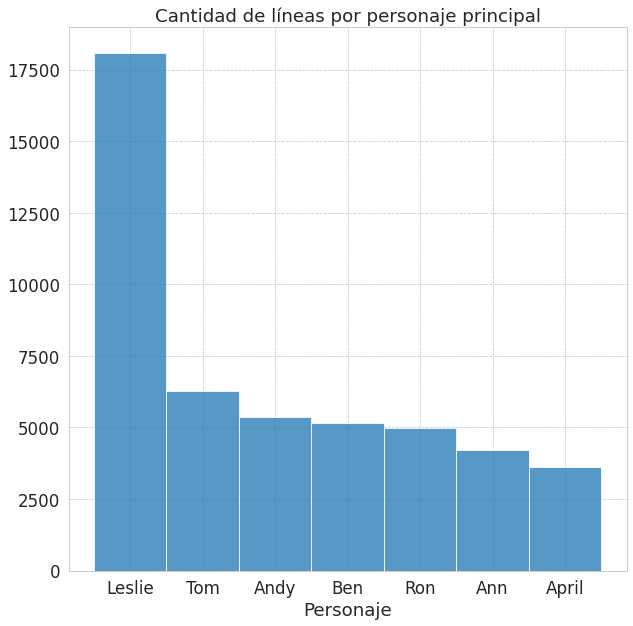

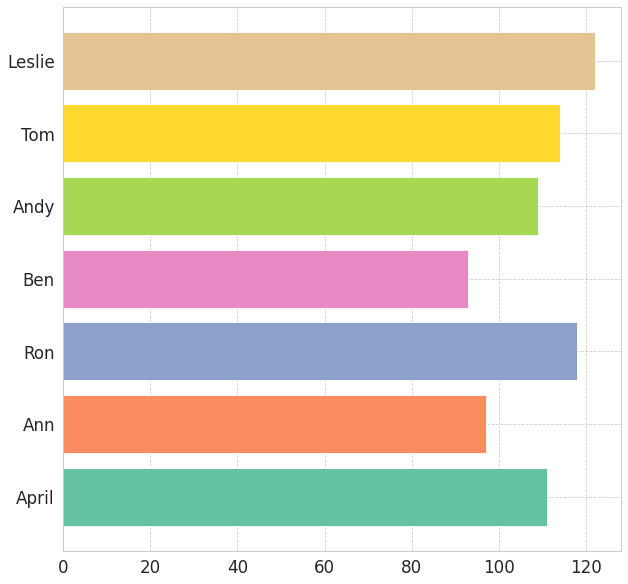

In [ ]:
df = pd.concat([df_all[df_all['Character']== nombre] for nombre in lista_personajes])
#personajes = df['Character'].value_counts()
sns.set_context("paper", font_scale = 1.9,) 
sns.set_style("whitegrid",rc = {'grid.linestyle': '--'})

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
sns.histplot(data = df['Character'], stat="count", discrete = True)
ax.set_title('Cantidad de líneas por personaje principal')
ax.set_xticks(np.asarray([i for i in range(len(lista_personajes))]))
ax.set_xlabel('Personaje')
ax.set_ylabel('')
ax.set_xticklabels(["Leslie", "Tom", "Andy", "Ben", "Ron", "Ann", "April"], rotation=0)
plt.savefig("/content/drive/My Drive/Labo de datos/Wordclouds/lineas por personaje.png")


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
axs[1] = plt.barh(["Leslie", "Tom", "Andy", "Ben", "Ron", "Ann", "April"][::-1], [sum([isCharacter(df, nombre, 20) for df in dataframes_s1+ dataframes_s2 + dataframes_s3 + dataframes_s4 + dataframes_s5 + 
                     dataframes_s6 + dataframes_s7]) for nombre in lista_personajes][::-1], color = plt.get_cmap('Set2').colors)
plt.axvline(x=122, color='r', linestyle='--')
plt.title('Cantidad de capítulos con aparición del personaje')
plt.xticks([0, 20, 50, 75, 100, 122])
plt.savefig("/content/drive/My Drive/Labo de datos/Wordclouds/apariciones por cap.png")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


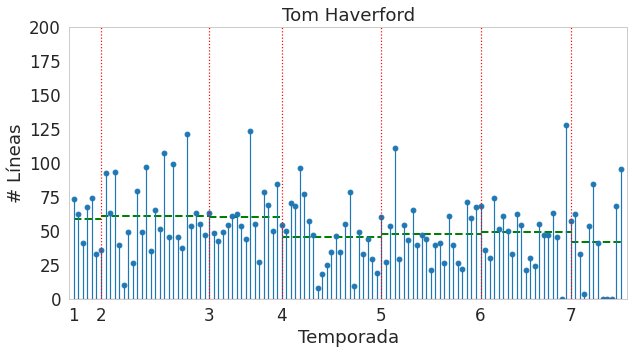

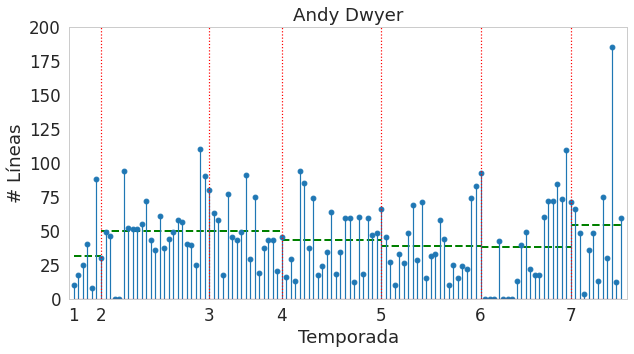

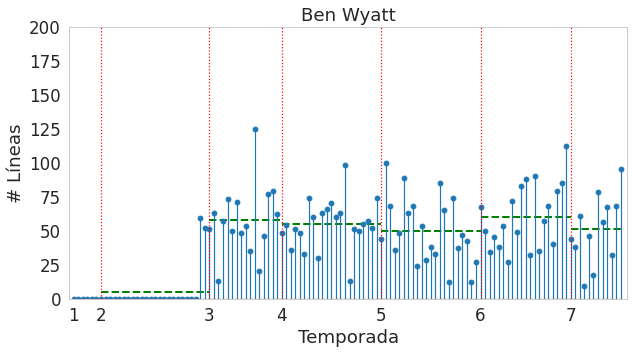

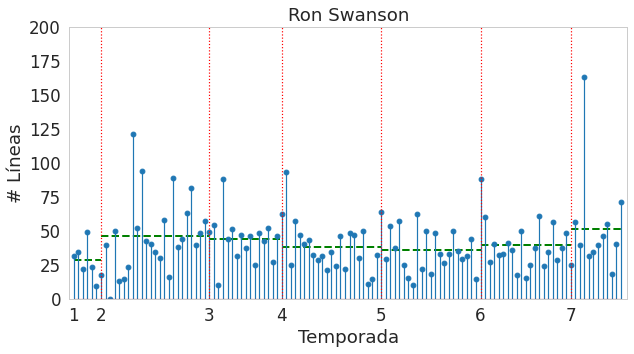

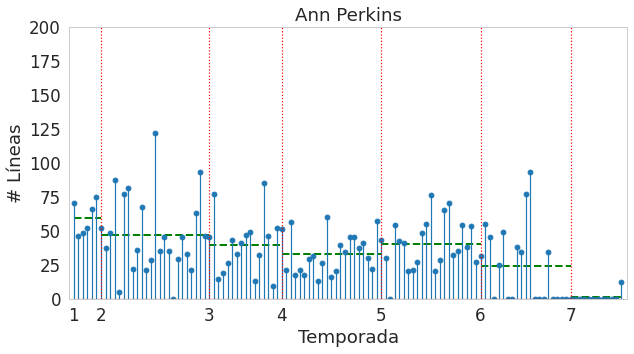

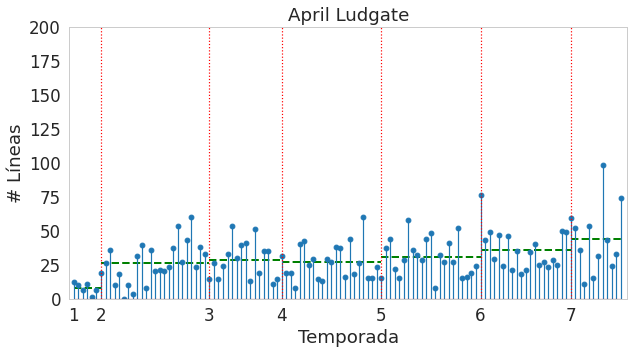

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


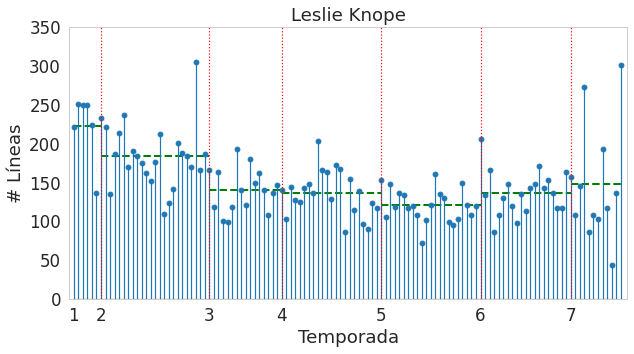

In [ ]:
sns.set_context("paper", font_scale = 1.9,) 
sns.set_style("whitegrid",rc = {'grid.linestyle': ''})
lista = ['Tom Haverford', 'Andy Dwyer', 'Ben Wyatt', 'Ron Swanson', 'Ann Perkins', 'April Ludgate']
for nombre in lista:
  fig, ax = plt.subplots(figsize = (10,5))
  x =list(range(1,123))
  y=[len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s1+dataframes_s2+dataframes_s3+dataframes_s4
      +dataframes_s5+dataframes_s6+dataframes_s7]
  plt.stem(x, y)
  plt.axis([0, 123.5, 0, 200])
  plt.axvline(x=7, color='r', linestyle='dotted')
  plt.axvline(x= 31, color ='r', linestyle='dotted')
  plt.axvline(x= 47,color='r', linestyle='dotted')
  plt.axvline(x=69,color='r', linestyle='dotted')
  plt.axvline(x=91, color='r', linestyle='dotted')
  plt.axvline(x=111,color='r', linestyle='dotted')
  ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s1]), xmin=1, xmax=7, linewidth=2, color='g', linestyle = '--')
  ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s2]), xmin=7, xmax=31, linewidth=2, color='g', linestyle = '--')
  ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s3]), xmin=31, xmax=47, linewidth=2, color='g',linestyle = '--')
  ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s4]), xmin=47, xmax=69, linewidth=2, color='g', linestyle = '--')
  ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s5]), xmin=69, xmax=91, linewidth=2, color='g',linestyle = '--')
  ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s6]), xmin=91, xmax=111, linewidth=2, color='g', linestyle = '--')
  ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s7]), xmin=111, xmax=122, linewidth=2, color='g', linestyle = '--')
  plt.xticks([1, 7, 31, 47, 69, 91, 111], labels=["1","2", "3", "4", "5","6","7"])
  plt.xlabel('Temporada')
  plt.ylabel('# Líneas')
  plt.title(nombre)
  plt.savefig("/content/drive/My Drive/Labo de datos/Wordclouds/Lineas por cap " +nombre+".png")
  plt.show()

fig, ax = plt.subplots(figsize = (10,5))
nombre = "Leslie Knope"
x =list(range(1,123))
y=[len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s1+dataframes_s2+dataframes_s3+dataframes_s4
    +dataframes_s5+dataframes_s6+dataframes_s7]
plt.stem(x, y)
plt.axis([0, 123.5, 0, 350])
plt.axvline(x=7, color='r', linestyle='dotted')
plt.axvline(x= 31, color ='r', linestyle='dotted')
plt.axvline(x= 47,color='r', linestyle='dotted')
plt.axvline(x=69,color='r', linestyle='dotted')
plt.axvline(x=91, color='r', linestyle='dotted')
plt.axvline(x=111,color='r', linestyle='dotted')
ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s1]), xmin=1, xmax=7, linewidth=2, color='g', linestyle = '--')
ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s2]), xmin=7, xmax=31, linewidth=2, color='g', linestyle = '--')
ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s3]), xmin=31, xmax=47, linewidth=2, color='g',linestyle = '--')
ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s4]), xmin=47, xmax=69, linewidth=2, color='g', linestyle = '--')
ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s5]), xmin=69, xmax=91, linewidth=2, color='g',linestyle = '--')
ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s6]), xmin=91, xmax=111, linewidth=2, color='g', linestyle = '--')
ax.hlines(y=np.mean([len(list(df[df['Character']==nombre]['Character'])) for df in dataframes_s7]), xmin=111, xmax=122, linewidth=2, color='g', linestyle = '--')
plt.xticks([1, 7, 31, 47, 69, 91, 111], labels=["1","2", "3", "4", "5","6","7"])
plt.xlabel('Temporada')
plt.ylabel('# Líneas')
plt.title(nombre)
plt.savefig("/content/drive/My Drive/Labo de datos/Wordclouds/Lineas por cap " +nombre+".png")
plt.show()

In [3]:
#%%STOPWORDS

my_file = open("/content/drive/My Drive/Labo de datos/stopwords-en.txt", "r")

content = my_file.read()

lista = content.split()


Stopwords = stopwords.words('english') + lista + ['mmmhmm','uhoh','boola','blah','daren', 'herse', 'himse', 'itse', 'mayn', 'mon', 'myse', 'oughtn','whoo', 'ohh', 'mmhmm', 'mmmm','yup', 'ya', 'em', 'ugh', 'hur', 'ew', 'huh', 'gosh', 'guys','hu', 'guy', 'ha', 'time', 'wanna', 'whoa', 'god', 'gonna', 'hey', 'yeah', 'wow', 'uh', 'gotta', 'mmm', 'shh', 'hmm', 'yea']

Stopwords2 = Stopwords + ['day', 'boo', 'knope', 'swanson', 'perkins', 'haverford', 'wyatt', 'ludgate', 'gergich', 'gengurch', 'fine', 'brendanawicz', 'griggs', 'dwyer']


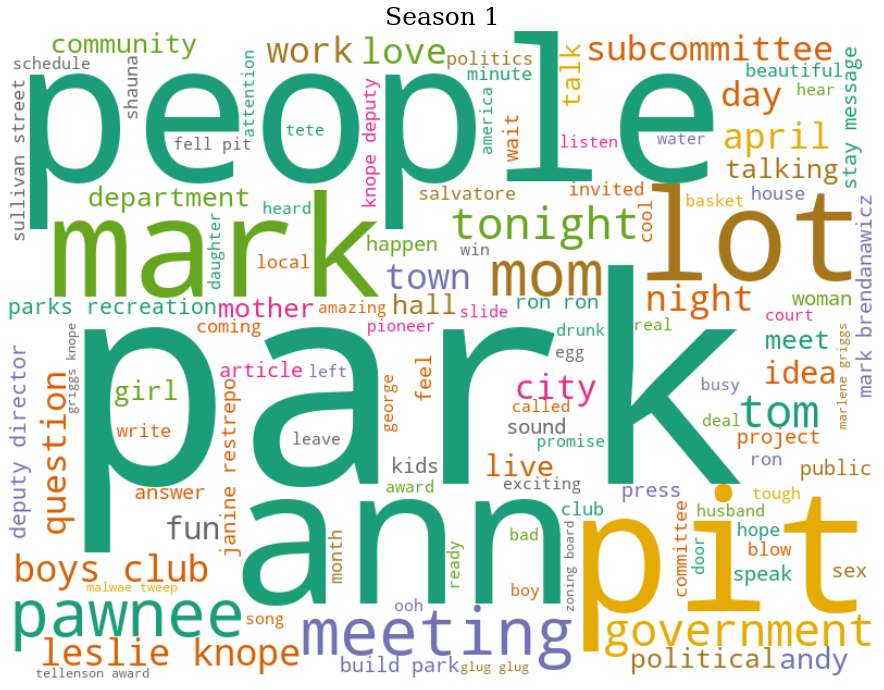

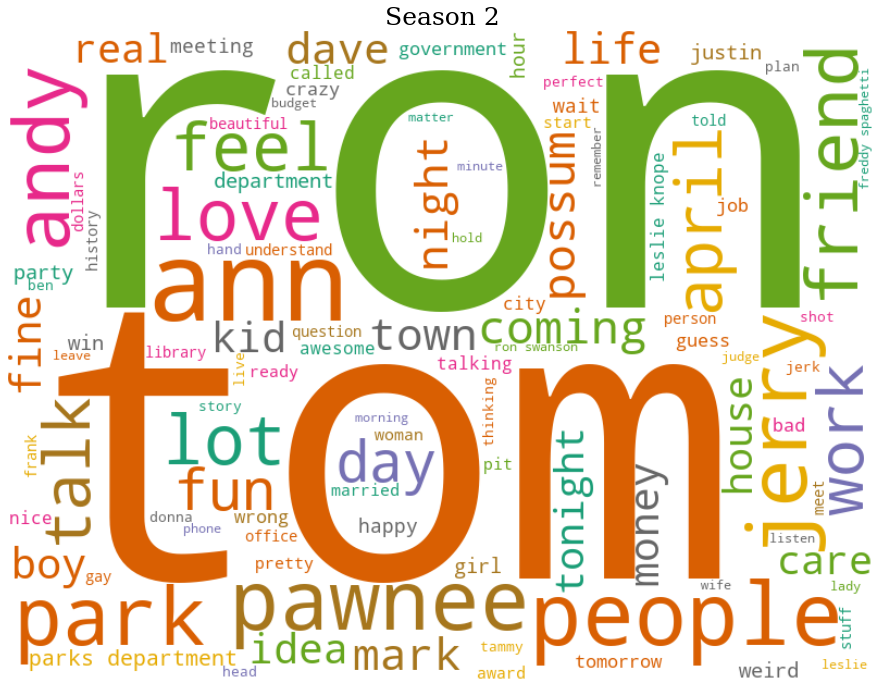

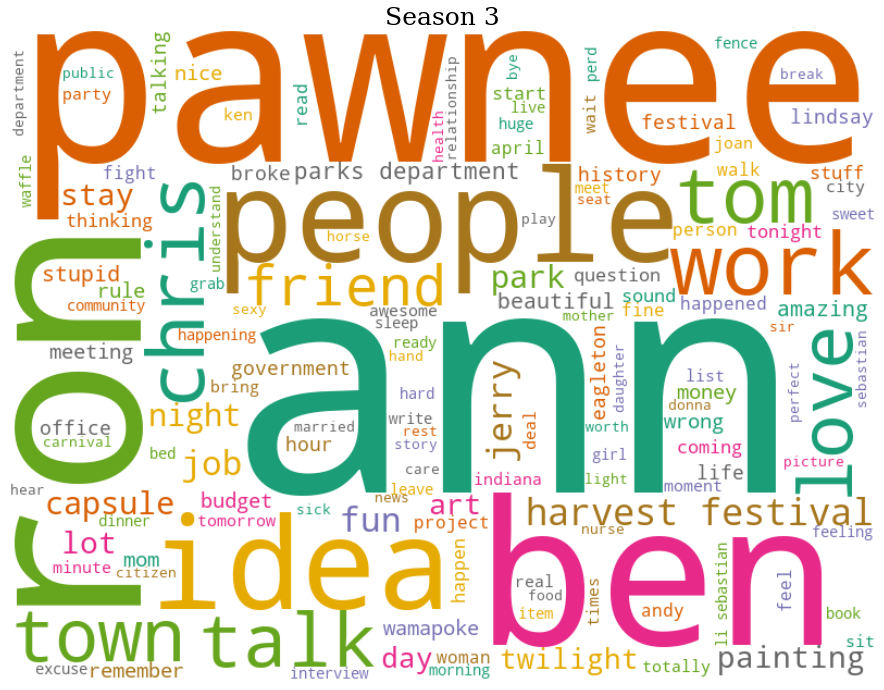

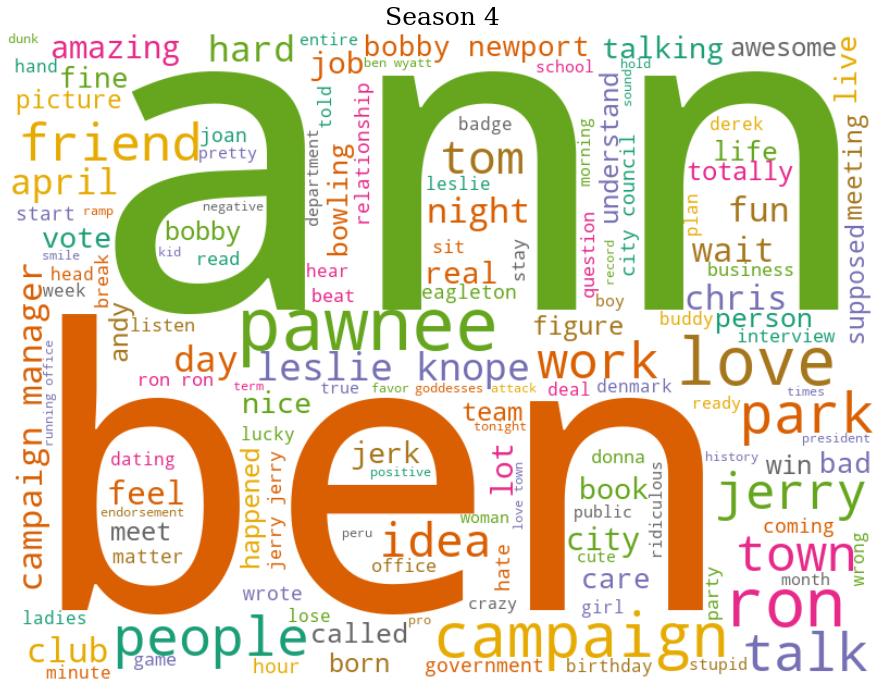

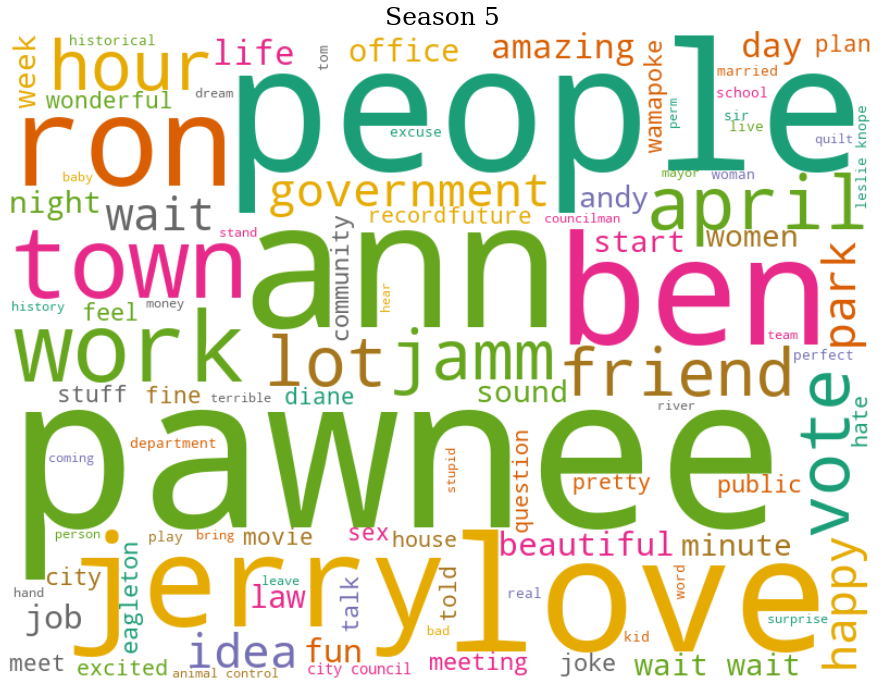

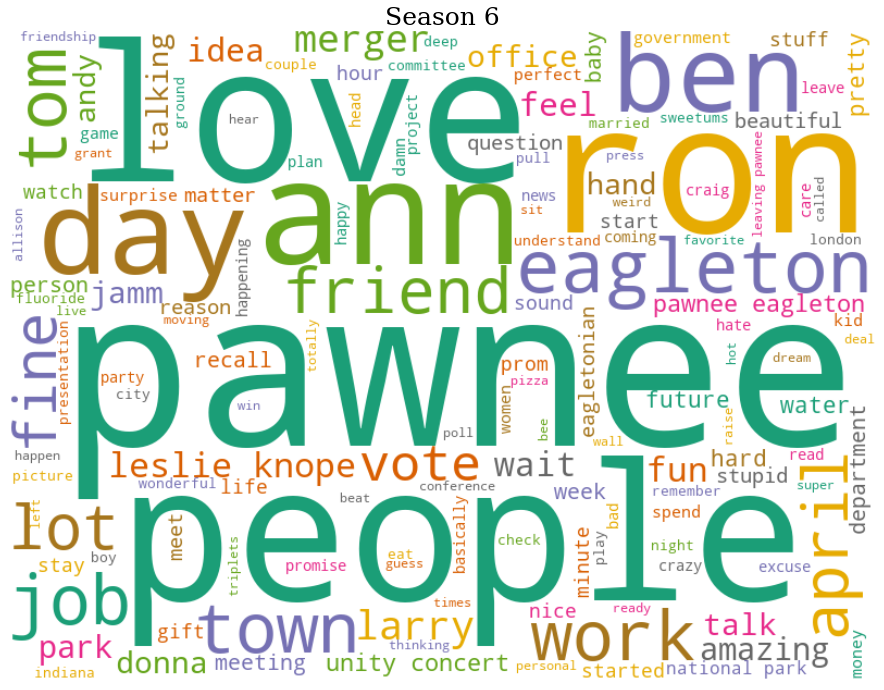

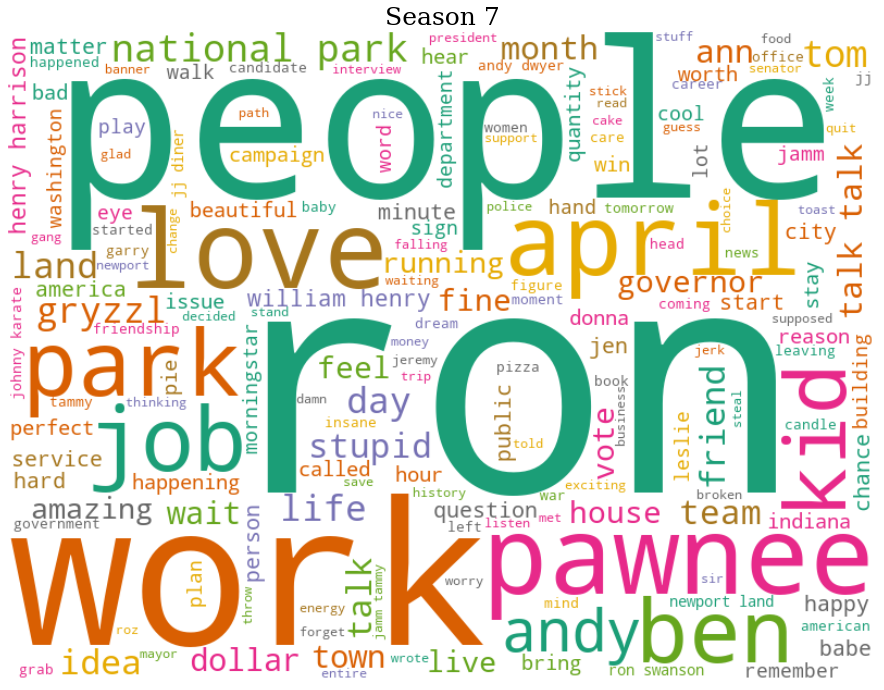

In [ ]:
#%%WORDCLOUDS POR TEMPORADAS

nombre_personaje = "Leslie Knope"

dataframes_personaje = [df[df['Character']== nombre_personaje] for df in dataframes]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }

for i in range(0,7):   
    df = dataframes_personaje[i]
    df_clean = pd.DataFrame(df['Line'].apply(round1))
    modified = []
    for e in df_clean['Line']:
      modified.append(re.sub(r"\([^()]*\)", "", e))
  
    df_clean['Line'] = modified
    transcript = ''
    for t in df_clean['Line']:
        transcript = transcript + t

    wc = WordCloud(width=800, height=600, stopwords=Stopwords, background_color="white", colormap="Dark2",
                  min_font_size=12, random_state=42)
     
    plt.rcParams['figure.figsize'] = [20,12] 
    
    wc.generate(transcript)  
    plt.imshow(wc, interpolation="bilinear")  
    plt.axis("off")
    plt.title("Season "+ str(i+1), fontdict=font)
    plt.show()
    wc.to_file("/content/drive/My Drive/Labo de datos/Wordclouds/"+ nombre_personaje +" Season "+ str(i+1)+".png")


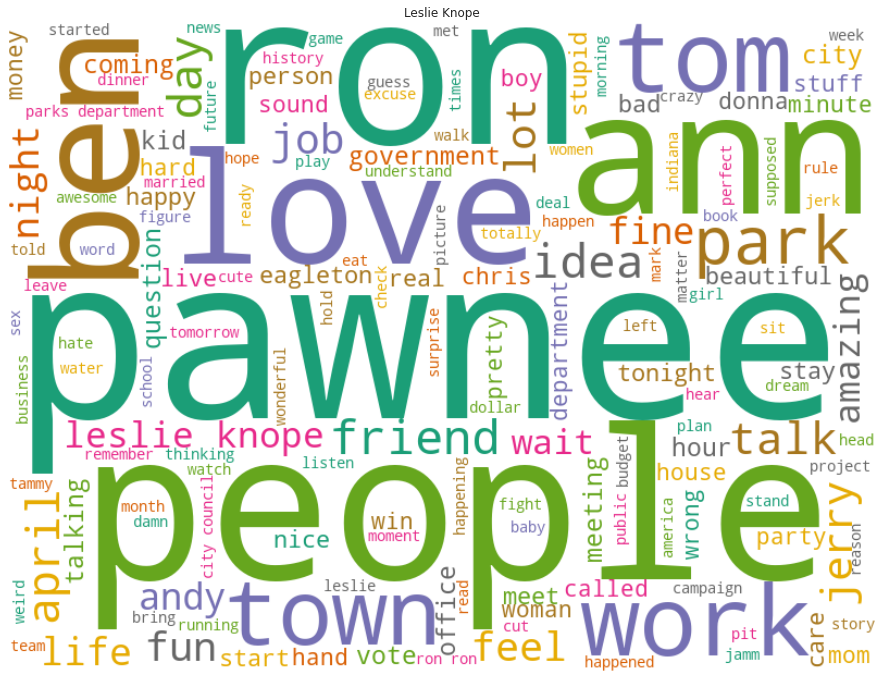

In [ ]:
#%%WORDCLOUDS POR SERIE ENTERA

nombre_personaje = "Leslie Knope"

df = df_all[df_all['Character']==nombre_personaje]
df_clean = pd.DataFrame(df['Line'].apply(round1))
modified = []
for e in df_clean['Line']:
  modified.append(re.sub(r"\([^()]*\)", "", e))

df_clean['Line'] = modified
transcript = ''
for t in df_clean['Line']:
    transcript = transcript + t

wc = WordCloud(width=800, height=600, stopwords=Stopwords, background_color="white", colormap="Dark2",
               min_font_size=12, random_state=42)
 
plt.rcParams['figure.figsize'] = [20,12] 

wc.generate(transcript)  
#plt.subplot(4, 3)
plt.imshow(wc, interpolation="bilinear")  
plt.axis("off")
plt.title(nombre_personaje)
plt.show()
wc.to_file("/content/drive/My Drive/Labo de datos/Wordclouds/"+ nombre_personaje + ".png")


In [ ]:
#%%WORD2VEC -- esto habria que mejorarlo, porque no esta dando bien y tendriamos que entender que pasa 
df = pd.concat(dataframes_text)

#df['Line'] = pd.concat([df['Character']+' '+df['Line'] for df in dataframes_s1 + dataframes_s2 + dataframes_s3 + dataframes_s4 + dataframes_s5 + dataframes_s6+ dataframes_s7])

df_clean = pd.DataFrame(df['Text'].apply(round1))
 
data_final =  pd.DataFrame(df_clean['Text'].apply(round3))

sentences = [row.split() for row in data_final['Text']]

cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=15, # ignora palabras cuya frecuencia es menor a esta
                     window=2, # tamanio de la ventana de contexto
                     size=50, # dimension del embedding
                     sample=6e-5, # umbral para downsamplear palabras muy frecuentes
                     alpha=0.03, # tasa de aprendizaje inicial (entrenamiento de la red neuronal)
                     min_alpha=0.0007, # tasa de aprendizaje minima
                     negative=10, # penalidad de palabras muy frecuentes o poco informaitvas
                     workers=cores) # numero de cores para entrenar el modelo

w2v_model.build_vocab(sentences, progress_per=10000) # construye el vocabulario

### ENTRENA EL MODELO
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
### PRECOMPUTA DISTANCIAS (mas rapido)
w2v_model.init_sims(replace=True)


In [ ]:
import sys
all_sims = w2v_model.wv.most_similar(positive = ["ann"], topn=sys.maxsize)
last_10 = list(reversed(all_sims[-10:]))
print(last_10)


[('grid', 0.5317866206169128), ('chop', 0.5518400073051453), ('cube', 0.5808621644973755), ('kick', 0.5950868725776672), ('poker', 0.6637194752693176), ('bounce', 0.6711066365242004), ('butt', 0.7431197762489319), ('chavez', 0.8554837703704834), ('harrison', 0.8607046604156494), ('henry', 0.8730248808860779)]


In [ ]:
for e in w2v_model.wv.most_similar(positive=["andy"], topn = 5): 
  print("\n")
  print(e)
print("\n")



('dwyer', 0.9971333742141724)


('weird', 0.9967759251594543)


('lead', 0.9967222213745117)


('kissed', 0.9966524243354797)


('stuff', 0.9965491890907288)




Poniendo todo el texto al menos da las primeras dos palabras de manera razonable

In [ ]:
#%%% DEFINICION SCATTERPLOT
def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 50), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    close_words = model.wv.most_similar([word])
    
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    sns.set_context("paper", font_scale = 1.9,) 
    sns.set_style("whitegrid",rc = {'grid.linestyle': '--'})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE de {}'.format(word.title()))
    plt.savefig("/content/drive/My Drive/Labo de datos/Wordclouds/scatterplot "+ word+".png")
    

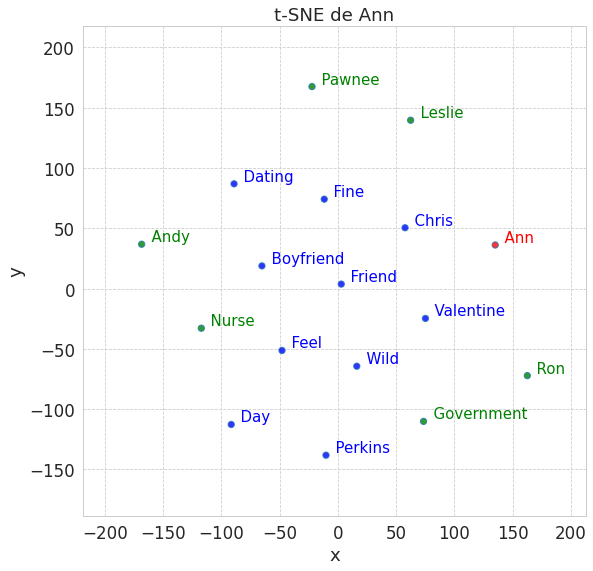

In [ ]:
#%%SCATTER PLOT
tsnescatterplot(w2v_model, 'ann', ['leslie', 'andy', 'ron', 'government', 'pawnee', 'nurse'])


#Intento ver palabras cercanas y lejanas con leslie por temporada

In [ ]:
nombre_personaje = "Leslie Knope"

df_s1 = df_s1[df_s1['Character']==nombre_personaje]
df_clean = pd.DataFrame(df['Line'].apply(round1))
transcript = ''
for t in df_clean['Line']:
    transcript = transcript + t

wc = WordCloud(width=800, height=600, stopwords=Stopwords, background_color="white", colormap="Dark2",
               min_font_size=12, random_state=42)
 
plt.rcParams['figure.figsize'] = [20,12] 

wc.generate(transcript)  
#plt.subplot(4, 3)
plt.imshow(wc, interpolation="bilinear")  
plt.axis("off")
plt.title(nombre_personaje)
plt.show()
wc.to_file("/content/drive/My Drive/Labo de datos/Wordclouds/"+ nombre_personaje + ".png")

In [ ]:
#%%WORD2VEC -- esto habria que mejorarlo, porque no esta dando bien y tendriamos que entender que pasa 

def w2v_model(nombre_personaje, numero_temporada):
  """El número de temporada está entre 1 y 7"""
  temp = enumerate([df_s1, df_s2, df_s3, df_s4, df_s5, df_s6, df_s7])
  
  nuevo_df = list(temp)[numero_temporada -1][1]

  nuevo_df = nuevo_df[nuevo_df["Character"]==nombre_personaje]

  nueva_columna = zip(list(nuevo_df['Character']), list(nuevo_df['Line']))

  nuevo_df["Line"]= [e[0] + " "+ e[1] for e in nueva_columna]

  df_clean = pd.DataFrame(df['Line'].apply(round1))
  
  data_final =  pd.DataFrame(df_clean['Line'].apply(round3))

  sentences = [row.split() for row in data_final['Line']]

  cores = multiprocessing.cpu_count()

  w2v_model = Word2Vec(min_count=15, # ignora palabras cuya frecuencia es menor a esta
                      window=3, # tamanio de la ventana de contexto
                      size=50, # dimension del embedding
                      sample=6e-5, # umbral para downsamplear palabras muy frecuentes
                      alpha=0.03, # tasa de aprendizaje inicial (entrenamiento de la red neuronal)
                      min_alpha=0.0007, # tasa de aprendizaje minima
                      negative=20, # penalidad de palabras muy frecuentes o poco informaitvas
                      workers=cores) # numero de cores para entrenar el modelo

  w2v_model.build_vocab(sentences, progress_per=10000) # construye el vocabulario

  ### ENTRENA EL MODELO
  w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
  ### PRECOMPUTA DISTANCIAS (mas rapido)
  w2v_model.init_sims(replace=True)

  return w2v_model



In [ ]:
modelo = w2v_model('Leslie Knope', 3)

modelo.most_similar(positive=["ben"], topn = 5)

In [ ]:
#%%% DEFINICION SCATTERPLOT
def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 50), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    close_words = model.wv.most_similar([word])
    
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE de {}'.format(word.title()))
    

In [ ]:
tsnescatterplot(w2v_model("Leslie Knope", 4), "ben", [])

In [ ]:
w2v_model("leslie", 1).most_similar(positive=["ann"], topn = 5)

In [ ]:
tsnescatterplot(w2v_model("leslie", 2), "leslie", [])

In [ ]:
tsnescatterplot(w2v_model("leslie", 3), "leslie", [])

#Análisis de tópicos

In [ ]:
#%%ANALISIS DE TOPICOS


#components_ = [4,4,6,6,6,4,4]
#for i in range(0,7):

count = CountVectorizer(min_df = 3, max_df = 0.75, stop_words = Stopwords2)

# Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos
x_count = count.fit_transform(pd.concat(dataframes_text)['Text'])

# Dimensions de la matriz doc-tér
#print(x_count.shape)

# Creamos el objeto tf-idf. Le decimos además que devuelva los
# vectores documento con norma euclídea igual a 1 (norm = 'l2')
tfidf = TfidfTransformer(norm = 'l2')

# Creamos la matriz tf-idf a partir de la matriz de frecuencias
x_tfidf = tfidf.fit_transform(x_count)

# Elijamos la cantidad de tópicos
n_components = 7

# Construímos el objeto NMF con los tópicos indicados 
nmf = NMF(n_components = n_components)

# Aplicamos sobre nuestros datos
x_nmf = nmf.fit_transform(x_tfidf)

# Dimensión de la matriz transformada
#print(x_nmf.shape)

# Objeto índice: término de nuestro vocabulario
vocabulary = {item: key for key, item in count.vocabulary_.items()}

#print("Season "+ str(i+1))
# Para cada componente
for n in range(n_components):

  # Ordenamos una lista del largo de nuestro vocabulario según el peso en cada componente y nos quedamos con los primeros 10
  list_sorted = sorted(range(nmf.components_.shape[1]), reverse = True, key = lambda x: nmf.components_[n][x])[:10]

  # Printeamos los términos asociados a los valores más grande de cada una de las componentes
  print(', '.join([vocabulary[i] for i in list_sorted]))
  print('\n')

chris, party, night, jamm, justin, councilman, tonight, office, married, business


newport, bobby, campaign, vote, vans, win, manager, barkley, debate, spin


pit, park, mark, fell, parks, government, subcommittee, meeting, department, build


jerry, sebastian, champion, ginuwine, carl, wamapoke, li, gayle, diane, chris


tammy, library, jamm, vote, gold, jello, baby, jail, chicago, glenn


gryzzl, karate, johnny, land, national, kids, jj, yo, terry, henry


eagleton, larry, merger, birthday, fence, concert, unity, eagletonians, craig, eric




Aca los topicos 2, 3, 5 y 7 son bastante razonables mientras que 1 es cualquiera y 6 tiene algunas palabras bien conectadas (justin, frank, valentine, marlene, mom) mientras que las demas son bastante fruta

#IMDB


In [ ]:
df_ratings = pd.read_csv('/content/drive/My Drive/Labo de datos/IMDB/title.ratings.tsv', sep = '\t')

df_titles = pd.read_csv('/content/drive/My Drive/Labo de datos/IMDB/title.episode.tsv', sep = '\t')

df_tit_rat = pd.merge(df_titles, df_ratings, on='tconst')


In [ ]:
df_tit_rat.drop(index = df_tit_rat[df_tit_rat['seasonNumber']=='\\N'].index, inplace = True)

df_tit_rat['seasonNumber'] = df_tit_rat['seasonNumber'].astype(int)

df_tit_rat['episodeNumber'] = df_tit_rat['episodeNumber'].astype(int)


In [ ]:
i = 0
for title in list(df_tit_rat['parentTconst'].unique()):
  df = df_tit_rat[df_tit_rat['parentTconst'] == title]
  if max(list(df['averageRating'])) == list(df.sort_values(['seasonNumber', 'episodeNumber'], ascending=[False, False])['averageRating'])[0]:
    i = i+1

print(len(list(df_tit_rat['parentTconst'].unique())))
print(i)

In [ ]:
fig, ax = plt.subplots( figsize = (18, 6))
ax.pie([i / len(list(df_tit_rat['parentTconst'].unique())), (len(list(df_tit_rat['parentTconst'].unique())) -i)/len(list(df_tit_rat['parentTconst'].unique()))], colors = plt.get_cmap('Set2').colors)
ax.legend(['Sí', 'No'])
ax.set_title('¿Es el último capítulo el mejor rankeado de la serie?')
plt.show()

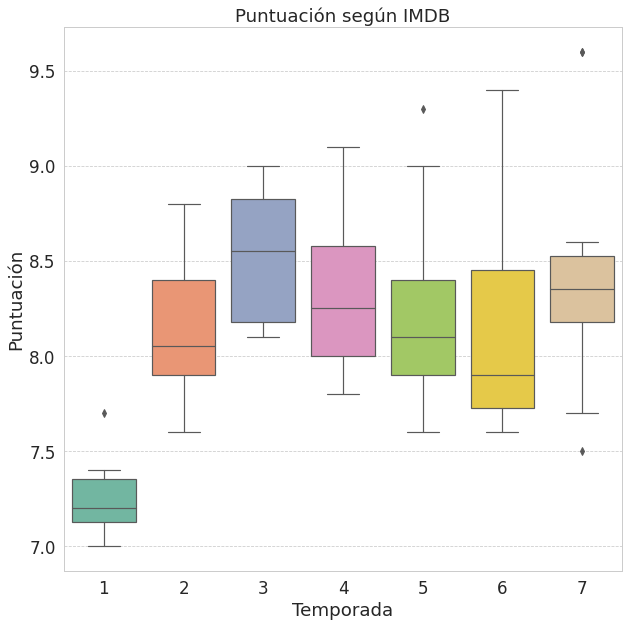

In [ ]:
df_titulos_parks = df_tit_rat[df_tit_rat['parentTconst']=='tt1266020']

#data = [df_titulos_parks[df_titulos_parks['seasonNumber']==i]['averageRating'].array for i in range(1,8)]

sns.set_context("paper", font_scale = 1.9,) 
sns.set_style("whitegrid",rc = {'grid.linestyle': '--'})

fig, ax = plt.subplots( figsize = (10, 10))
ax = sns.boxplot(x = 'seasonNumber', y = 'averageRating', data = df_titulos_parks, palette='Set2')
ax.set_xlabel('Temporada')
ax.set_ylabel('Puntuación')
ax.set_title('Puntuación según IMDB')
plt.savefig("/content/drive/My Drive/Labo de datos/Wordclouds/IMDB.png")
plt.show()

In [8]:
#cargar los datos
f=open('/content/drive/MyDrive/Labo de datos/IMDB/commentsComplete (copy).txt', 'r')

text =f.readlines()
splited = [n.split(',') for n in text]

df= pd.DataFrame(data=splited, columns=['rating', 'title', 'comment'])
print(df.tail())

    rating  ...                                            comment
232  10/10  ...   Parks and rec is the best show i've ever watc...
233   2/10  ...   Apparently made by the people who made us ver...
234   1/10  ...   Have seen an original comedy since   NBC'S Cl...
235   1/10  ...   If you enjoy laughing at the completely inane...
236  10/10  ...   Parks and rec is LITERALLY    my favourite sh...

[5 rows x 3 columns]


In [9]:
#algo de limpieza
cleanRating=[]
for x in df.rating:
  a=x.replace('/10','')
  cleanRating.append(int(a))

cleanComment=[]
for x in df.comment:
  a=clean_text_round1(x)
  a=a.replace('found this helpful  was this review helpful  sign in to vote  permalink','')
  a=a.replace('out of','')
  cleanComment.append(a)

cleanTitle=[]
for x in df.title:
  a=clean_text_round1(x)
  cleanTitle.append(a)

df['rating']= cleanRating
df['comment']= cleanComment
df['title']=cleanTitle

df['title'].apply(round3)
df['comment'].apply(round3)



0        pre season post season   season office  main...
1       watch  drawn amy pohler   stayed beautifully ...
2        aware      episode     laughing episode  ser...
3       watched watched office expect level  office  ...
4       basically cute version office  office  hilari...
                             ...                        
232     park rec watched  love sense humor character ...
233     people version office   watched  watch origin...
234     original comedy   nbc classic chico    sandfo...
235     enjoy laughing completely inane stupid action...
236     park rec literally    favourite   watch   mid...
Name: comment, Length: 237, dtype: object

In [10]:
worst = df[df['rating']<5]

print (worst.head(10))

     rating  ...                                            comment
52        4  ...                                                   
83        1  ...                                                   
98        4  ...                                                   
107       1  ...   parks   rec is a show similar to the office b...
117       2  ...                                                   
119       1  ...   after watching a couple of episodes i realize...
120       3  ...   nbc did its best on thursday by sandwiching a...
123       3  ...   at least that would explain the repackaging o...
124       1  ...                                                   
125       1  ...   i m guessing you have to be of a certain poli...

[10 rows x 3 columns]


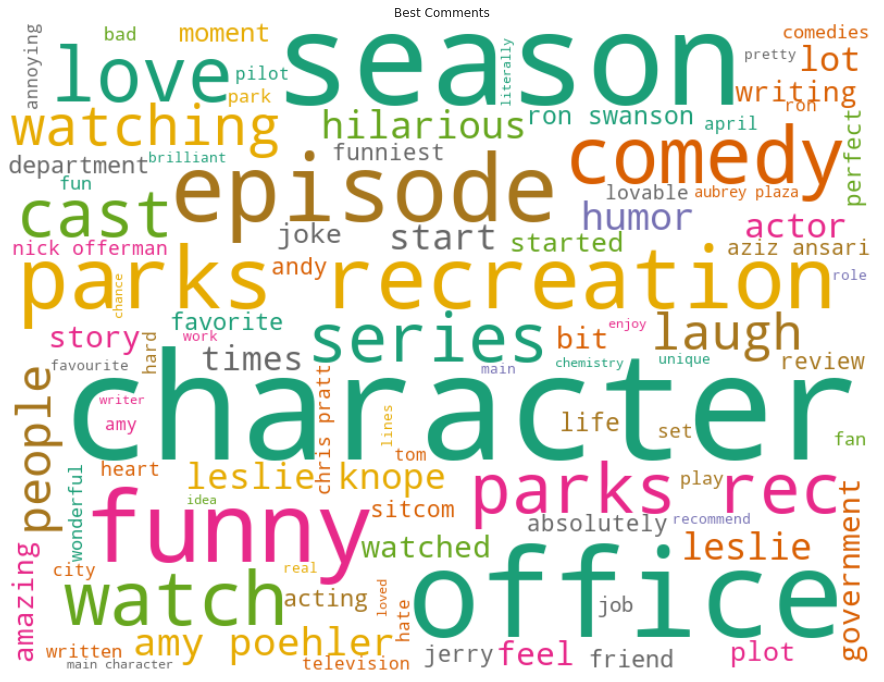

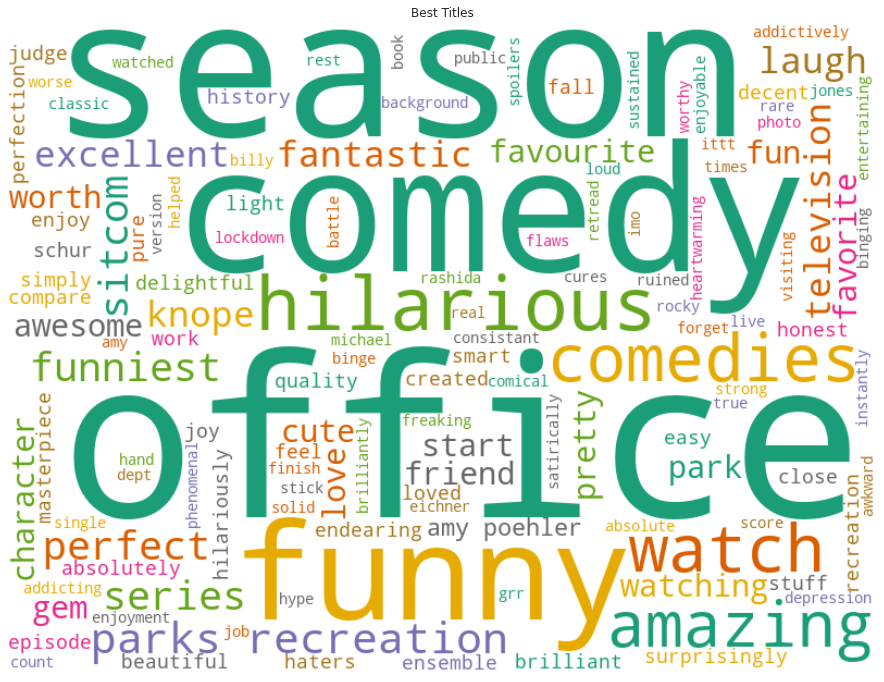

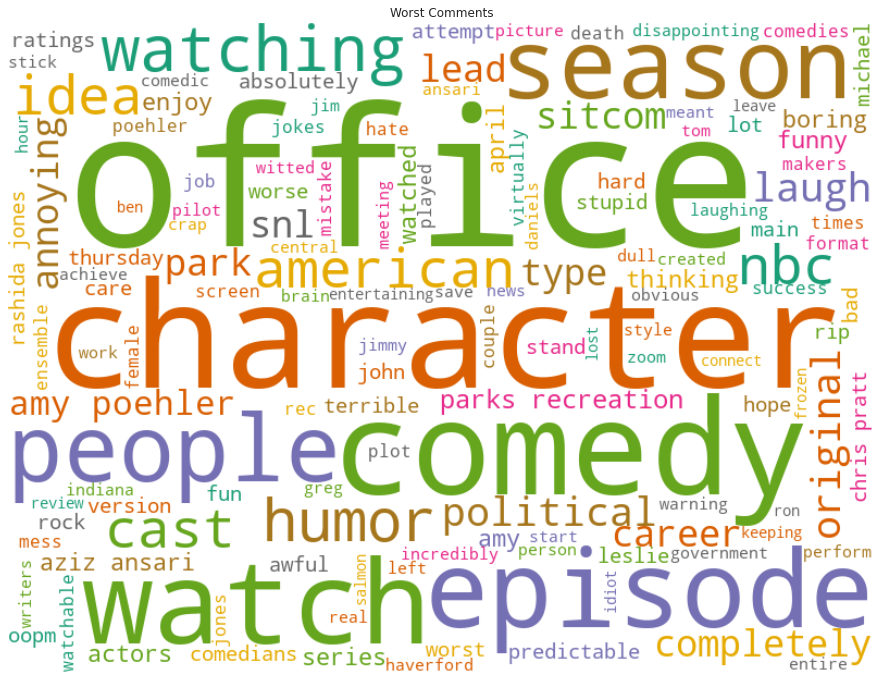

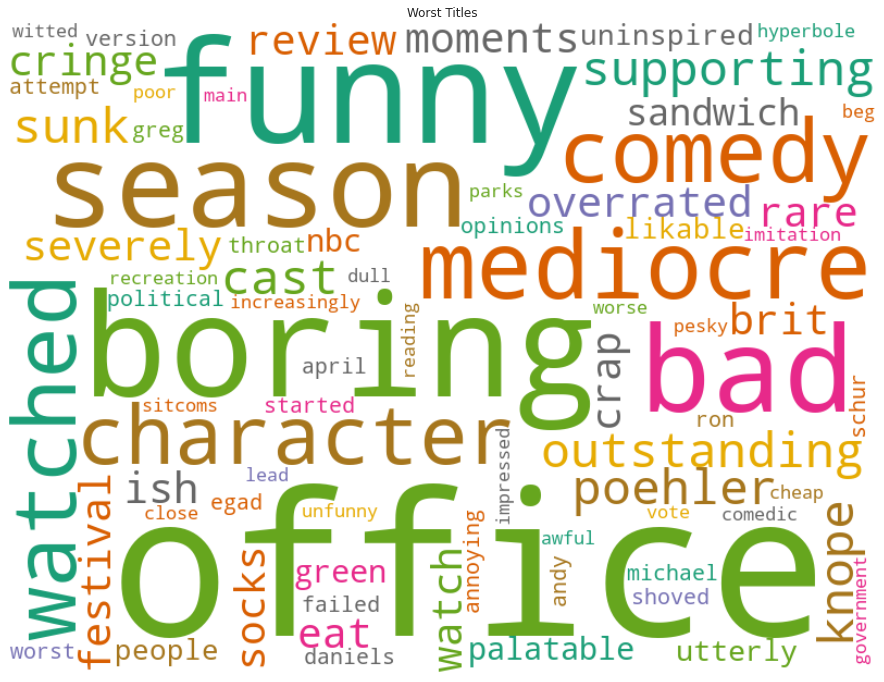

In [12]:
# WORDCLUD DE LOS MEJORES COMENTARIOS Y TITULOS

best = df[df['rating']>4]
worst = df[df['rating']<5]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }

wc = WordCloud(width=800, height=600, stopwords=Stopwords, background_color="white", colormap="Dark2",
              min_font_size=12, random_state=42)
  
plt.rcParams['figure.figsize'] = [20,12] 

transcript = ''
for t in best['comment']:
  transcript = transcript + t

wc.generate(transcript)  
plt.imshow(wc, interpolation="bilinear")  
plt.axis("off")
plt.title("Best Comments")
plt.show()
wc.to_file("/content/drive/My Drive/Labo de datos/Wordclouds/"+"Best Comments" +".png")

wc = WordCloud(width=800, height=600, stopwords=Stopwords, background_color="white", colormap="Dark2",
              min_font_size=12, random_state=42)
  
plt.rcParams['figure.figsize'] = [20,12] 

transcript = ''
for t in best['title']:
  transcript = transcript + t

wc.generate(transcript)  
plt.imshow(wc, interpolation="bilinear")  
plt.axis("off")
plt.title("Best Titles")
plt.show()
wc.to_file("/content/drive/My Drive/Labo de datos/Wordclouds/"+"Best Titles" +".png")


wc = WordCloud(width=800, height=600, stopwords=Stopwords, background_color="white", colormap="Dark2",
              min_font_size=12, random_state=42)
  
plt.rcParams['figure.figsize'] = [20,12] 

transcript = ''
for t in worst['comment']:
  transcript = transcript + t

wc.generate(transcript)  
plt.imshow(wc, interpolation="bilinear")  
plt.axis("off")
plt.title("Worst Comments")
plt.show()
wc.to_file("/content/drive/My Drive/Labo de datos/Wordclouds/"+"Worst Comments"+".png")



wc = WordCloud(width=800, height=600, stopwords=Stopwords, background_color="white", colormap="Dark2",
              min_font_size=12, random_state=42)
  
plt.rcParams['figure.figsize'] = [20,12] 

transcript = ''
for t in worst['title']:
  transcript = transcript + t

wc.generate(transcript)  
plt.imshow(wc, interpolation="bilinear")  
plt.axis("off")
plt.title("Worst Titles")
plt.show()
wc.to_file("/content/drive/My Drive/Labo de datos/Wordclouds/"+"Worst Titles"+".png")



#Emociones

In [ ]:
def hablaDe(oracion, palabras):
  return set(palabras.split()).issubset(set(oracion.split()))

True

In [ ]:

import nltk # En este caso, únicamente para stopwords
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
lista = [nombre for nombre in list(set(list(df_all['Character']))) if isCharacter(df_all, nombre, 100)]
nombres = [str(n).split()[0] for n in lista]
nombres = list(set(nombres))
nombres.remove('Extra')
nombres.remove('The')
nombres.remove('Dr.')
nombres.remove('Jerry')
nombres = list(map(clean_text_round1, nombres))

scores = []
df_clean = pd.DataFrame(df_Leslie['Line'].apply(round1))

for nombre in nombres + ['pawnee', 'waffles', 'jamm']: 

  df = df_Leslie[df_clean['Line'].map(lambda oracion: hablaDe(oracion, nombre))]

  lista_dic_total = [sia.polarity_scores(str(list(df['Line'])[i])) for i in range(len(list(df['Line'])))]

  lista_dic_unique = [sia.polarity_scores(str(list(dict.fromkeys(df['Line']))[i])) for i in range(len(list(dict.fromkeys(df['Line']))))]

  lista_noneutral = [d for d in lista_dic_total if d['neu']<0.75]

  lista_neg = [lista_dic_unique[i]['neg'] for i in range(len(lista_dic_unique))]
  media_neg = np.mean(lista_neg)
  lista_top_neg = sorted(range(len(lista_neg)), key=lambda i: lista_neg[i], reverse=True)[:5]

  lista_pos = [lista_dic_unique[i]['pos'] for i in range(len(lista_dic_unique))]
  media_pos = np.mean(lista_pos)
  lista_top_pos = sorted(range(len(lista_pos)), key=lambda i: lista_pos[i], reverse=True)[:5]
  if len(lista_noneutral) > 20:
    if nombre == 'jamm':
      print(nombre)
      for i in range(len(lista_top_neg)): 
        print(list(dict.fromkeys(df['Line']))[lista_top_neg[i]])
        print(sia.polarity_scores(list(dict.fromkeys(df['Line']))[lista_top_neg[i]]))
      print("\n")
    else:
      print(nombre)
      for i in range(len(lista_top_pos)): 
        print(list(dict.fromkeys(df['Line']))[lista_top_pos[i]])
        print(sia.polarity_scores(list(dict.fromkeys(df['Line']))[lista_top_pos[i]]))
      print("\n")

    scores.append((nombre ,np.mean([lista_noneutral[i]['compound'] for i in range(len(lista_noneutral))])))

print(scores)

ron
Congratulations, Ron.
{'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.5994}
Wow, Ron.
{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859}
Yes, Ron.
{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
Ron, please.
{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}
Please, Ron.
{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}


tom
Yeah, thanks, Tom.
{'neg': 0.0, 'neu': 0.164, 'pos': 0.836, 'compound': 0.6249}
Thanks, Tom.
{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}
Yes, Tom.
{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4019}
Tom, please.
{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'compound': 0.3182}
Okay, Tom, I'm ready.
{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.5267}


ann
Yes, Ann, yes.
{'neg': 0.0, 'neu': 0.156, 'pos': 0.844, 'compound': 0.6597}
Beautiful Ann.
{'neg': 0.0, 'neu': 0.204, 'pos': 0.796, 'compound': 0.5994}
Thanks, Ann!
{'neg': 0.0, 'neu': 0.239, 'pos': 0.761, 'compound': 0.4926}
Yes, An

In [ ]:
lista = ["eagleton", "eagletonian", "eagletonians"]

df = pd.concat([df_Leslie[df_clean['Line'].map(lambda oracion: hablaDe(oracion, nombre))] for nombre in lista])

lista_dic_total = [sia.polarity_scores(str(list(df['Line'])[i])) for i in range(len(list(df['Line'])))]

lista_noneutral = [d for d in lista_dic_total if d['neu']<0.75]

lista_neg = [lista_dic_unique[i]['neg'] for i in range(len(lista_dic_unique))]
media_neg = np.mean(lista_neg)
lista_top_neg = sorted(range(len(lista_neg)), key=lambda i: lista_neg[i], reverse=True)[:5]

lista_pos = [lista_dic_unique[i]['pos'] for i in range(len(lista_dic_unique))]
media_pos = np.mean(lista_pos)
lista_top_pos = sorted(range(len(lista_pos)), key=lambda i: lista_pos[i], reverse=True)[:5]

print("eagleton")
for i in range(len(lista_top_neg)): 
  print(list(dict.fromkeys(df['Line']))[lista_top_neg[i]])
  print(sia.polarity_scores(list(dict.fromkeys(df['Line']))[lista_top_neg[i]]))
print("\n")
for i in range(len(lista_top_pos)): 
  print(list(dict.fromkeys(df['Line']))[lista_top_pos[i]])
  print(sia.polarity_scores(list(dict.fromkeys(df['Line']))[lista_top_pos[i]]))
print("\n")

scores.append(("eagleton",np.mean([lista_noneutral[i]['compound'] for i in range(len(lista_noneutral))])))



eagleton
Because Eagleton sucks.
{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.3612}
I told you that Eagletonians are awful, terrible people.
{'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.7269}
Eagleton is the land of rich, snobby jerks.
{'neg': 0.358, 'neu': 0.373, 'pos': 0.269, 'compound': -0.0516}
Yes, because Eagleton sucks.
{'neg': 0.347, 'neu': 0.278, 'pos': 0.375, 'compound': 0.0516}
Look, I hate Eagletonians as much as you do.
{'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'compound': -0.5719}


Yes, Eagleton is nicer than Pawnee.
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6808}
Okay, Eagleton Ron.
{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.2263}
Well, Eagleton Ron, we here in Pawnee value loyalty above all else.
{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'compound': 0.7906}
Leslie Knope, champion of the Pawnee Eagleton merger, "our most faithful citizen."
{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.796}
I just wish Pawnee and Eagl

In [ ]:
lista = ["jerry", "terry", "gary", "garry"]

df = pd.concat([df_Leslie[df_clean['Line'].map(lambda oracion: hablaDe(oracion, nombre))] for nombre in lista])

lista_dic_total = [sia.polarity_scores(str(list(df['Line'])[i])) for i in range(len(list(df['Line'])))]

lista_dic_unique = [sia.polarity_scores(str(list(dict.fromkeys(df['Line']))[i])) for i in range(len(list(dict.fromkeys(df['Line']))))]

lista_noneutral = [d for d in lista_dic_total if d['neu']<0.75]

lista_neg = [lista_dic_unique[i]['neg'] for i in range(len(lista_dic_unique))]
media_neg = np.mean(lista_neg)
lista_top_neg = sorted(range(len(lista_neg)), key=lambda i: lista_neg[i], reverse=True)[:5]

lista_pos = [lista_dic_unique[i]['pos'] for i in range(len(lista_dic_unique))]
media_pos = np.mean(lista_pos)
lista_top_pos = sorted(range(len(lista_pos)), key=lambda i: lista_pos[i], reverse=True)[:5]

scores.append(("jerry",np.mean([lista_noneutral[i]['compound'] for i in range(len(lista_noneutral))])))

print("jerry")
for i in range(len(lista_top_neg)): 
  print(list(dict.fromkeys(df['Line']))[lista_top_neg[i]])
  print(sia.polarity_scores(list(dict.fromkeys(df['Line']))[lista_top_neg[i]]))
print("\n")


jerry
Bloody hell, Jerry!
{'neg': 0.886, 'neu': 0.114, 'pos': 0.0, 'compound': -0.8313}
Jerry, that's disgusting and fake!
{'neg': 0.694, 'neu': 0.306, 'pos': 0.0, 'compound': -0.7777}
Damn it, Terry!
{'neg': 0.599, 'neu': 0.401, 'pos': 0.0, 'compound': -0.4574}
Damn it, Jerry.
{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4019}
Jerry's having a heart attack.
{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}




In [ ]:
print(scores)

[('ron', 0.2231876923076923), ('tom', 0.20006093749999998), ('ann', 0.31789453125), ('andy', 0.289192), ('april', 0.3713108695652174), ('ben', 0.35955747126436777), ('pawnee', 0.23546612903225808), ('jamm', -0.16863809523809525), ('eagleton', 0.13632666666666668), ('jerry', 0.16014843750000002)]


In [ ]:
print("eagleton")
for i in range(len(lista_top_neg)): 
  print(list(dict.fromkeys(df['Line']))[lista_top_neg[i]])
  print(sia.polarity_scores(list(dict.fromkeys(df['Line']))[lista_top_neg[i]]))
print("\n")

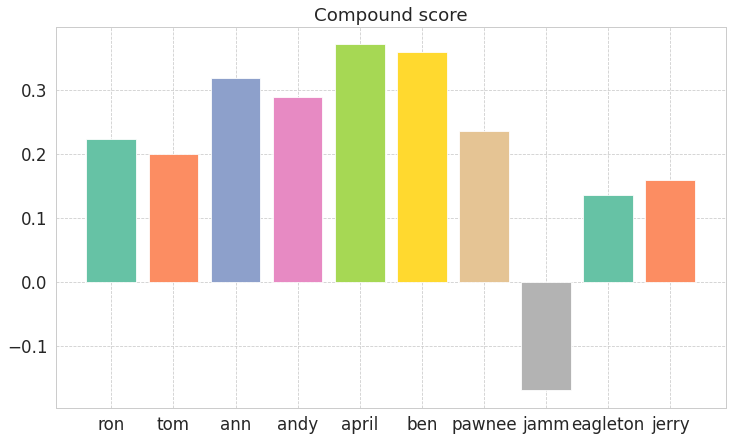

In [ ]:
x_coord = [l[0] for l in scores]
y_coord = [l[1] for l in scores]

sns.set_context("paper", font_scale = 1.9,) 
sns.set_style("whitegrid",rc = {'grid.linestyle': '--'})

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 7))
ax = plt.bar(x_coord, y_coord, color = plt.get_cmap('Set2').colors)
plt.title('Compound score')
plt.savefig("/content/drive/My Drive/Labo de datos/Wordclouds/Midiendo el amor.png")
plt.show()
